In [2]:
using Pkg; Pkg.activate("C:\\Users\\KarlH\\Desktop\\ComputationalPhysicsMaster\\Code\\OrbitalNeuralMethods")
using Revise
using OrbitalNeuralMethods
import OrbitalNeuralMethods as onm

  Activating project at `C:\Users\KarlH\Desktop\ComputationalPhysicsMaster\Code\OrbitalNeuralMethods`


In [3]:
import Random
rng = Random.MersenneTwister();

In [4]:
n = 2
ω = 0.25
ham = HOCoulomb(ω, shielding = 0.25);

l = 10
basis = SpinBasis(HOBasis(l, ω))
grid = [x for x in range(-10, stop = 10, length = 2001)]
system = System(n, basis, grid, ham);

mixer = Alpha(0.5)
rhf = RHF(system, mixer);
rhf = compute_ground_state!(rhf, max_iter = 100, tol = 1e-10, verbose=0);
energy(rhf)

1.17957942722023

In [5]:
slater = Slater(rhf);

In [6]:
function energy_opt(wf, optimizer)
    ham = HOCoulomb(0.25, shielding = 0.25);

    metro = Importance(equils = 1e4, samples = 1e4, step = 0.01);
    t = @elapsed wf_final, wf_opt, grad_results = optimize(wf, ham, metro, optimizer, nthreads = 12, verbose = true);
    println("\nGradient time: $(t) s")
    return wf_final, wf_opt
end

function energy_block(wf)
    samples_b = 2^23
    metro_b = Importance(equils = 1e6, samples = samples_b, step = 0.01);
    t = @elapsed result = blocking(wf, ham, metro_b, nthreads = 12);
    digits = Integer(-floor(log10(result.E_err)))
    print("$(round(result.E, digits=digits)) ± $(round(result.E_err, digits=digits)), $(round(result.E - 0.8247, digits=digits))")
    println("\nBlocking time: $(t) s")
end

energy_block (generic function with 1 method)

### 8

In [130]:
nn = NeuralNetwork([Dense(8), Tanh, Dense(1), Exp], n=n, rng = rng);
wf = SlaterNN(slater, nn);
optimizer = ADAM(wf, lr = 0.01, max_iter = 500, tol = 1e-6);
wf8_final, wf8_opt = energy_opt(wf, optimizer);
energy_block(wf8_final);
energy_block(wf8_opt);

E = 0.823816 iter = 500/500                                      
Gradient time: 19.4818574 s
0.829 ± 0.0003, 0.0043
Blocking time: 10.6545677 s
0.841 ± 0.001, 0.016
Blocking time: 5.7148292 s


### 16

In [131]:
nn = NeuralNetwork([Dense(16), Tanh, Dense(1), Exp], n=n, rng = rng);
wf = SlaterNN(slater, nn);
optimizer = ADAM(wf, lr = 0.01, max_iter = 500, tol = 1e-6);
wf16_final, wf16_opt = energy_opt(wf, optimizer);
energy_block(wf16_final);
energy_block(wf16_opt);

E = 0.830333 iter = 500/500                                      
Gradient time: 19.0669851 s
0.8267 ± 0.0002, 0.002
Blocking time: 6.5569922 s
0.846 ± 0.002, 0.022
Blocking time: 6.4427649 s


### 32

In [28]:
nn = NeuralNetwork([Dense(32), Tanh, Dense(1), Exp], n=n, rng = rng);
wf = SlaterNN(slater, nn);
optimizer = ADAM(wf, lr = 0.01, max_iter = 500, tol = 1e-6);
wf32_final, wf32_opt = energy_opt(wf, optimizer);
energy_block(wf32_final);
energy_block(wf32_opt);

E = 0.821034 iter = 500/500                                      
Gradient time: 24.2910968 s
0.8248 ± 0.0002, 0.0001
Blocking time: 8.4484889 s
-8.0 ± 5.0, -9.0
Blocking time: 8.1073479 s


In [29]:
samples_b = 2^27
metro_b = Importance(equils = 1e6, samples = samples_b, step = 0.01);
@time result = blocking(wf32_final, ham, metro_b, nthreads = 12);
digits = Integer(-floor(log10(result.E_err)))
print("$(round(result.E, digits=digits)) ± $(round(result.E_err, digits=digits)), $(round(result.E - 0.8247, digits=digits))")

 81.658549 seconds (2.37 k allocations: 11.001 GiB, 4.34% gc time)
0.82514 ± 8.0e-5, 0.00044

In [40]:
samples_b = 2^27
metro_b = Importance(equils = 1e6, samples = samples_b, step = 0.01);
@time result = blocking(wf32_final, ham, metro_b, nthreads = 12);
digits = Integer(-floor(log10(result.E_err)))
print("$(round(result.E, digits=digits)) ± $(round(result.E_err, digits=digits)), $(round(result.E - 0.8247, digits=digits))")

 86.025773 seconds (2.46 k allocations: 11.001 GiB, 4.67% gc time)
0.8255 ± 4.0e-5, 0.0008

### 48

In [132]:
nn = NeuralNetwork([Dense(48), Tanh, Dense(1), Exp], n=n, rng = rng);
wf = SlaterNN(slater, nn);
optimizer = ADAM(wf, lr = 0.01, max_iter = 500, tol = 1e-6);
wf48_final, wf48_opt = energy_opt(wf, optimizer);
energy_block(wf48_final);
energy_block(wf48_opt);

E = 0.82763 iter = 500/500                                       
Gradient time: 28.656277 s
0.8279 ± 0.0001, 0.0032
Blocking time: 10.3696976 s
0.8306 ± 0.001, 0.0059
Blocking time: 10.1952441 s


### 32 + 8

In [134]:
nn = NeuralNetwork([Dense(32), Tanh, Dense(8), Tanh, Dense(1), Exp], n=n, rng = rng);
wf = SlaterNN(slater, nn);
optimizer = ADAM(wf, lr = 0.01, max_iter = 500, tol = 1e-6);
wf328_final, wf328_opt = energy_opt(wf, optimizer);
energy_block(wf328_final);
energy_block(wf328_opt);

E = 0.855176 iter = 500/500                                      
Gradient time: 33.4176856 s
0.8627 ± 0.0003, 0.038
Blocking time: 12.2706119 s
0.855 ± 0.002, 0.031
Blocking time: 13.0354163 s


In [138]:
round((0.8290 - 0.8247) / 0.8247, digits=4)

0.0052

### Density

In [3]:
n = 2
ω = 0.25
ham = HOCoulomb(ω, shielding = 0.25);

l = 30
basis = SpinBasis(HOBasis(l, ω))
grid = [x for x in range(-10, stop = 10, length = 2001)]
system = System(n, basis, grid, ham);

In [4]:
hf = HF(system)
hf = compute_ground_state!(hf, max_iter = 1000, tol = 1e-10, verbose=0);
hf_dens = particle_density(System(hf));

In [6]:
rhf = RHF(system);
compute_ground_state!(rhf, max_iter = 1000, tol = 1e-10);
rhf_density  = particle_density(System(rhf));

In [7]:
import Plots as plt
plt.pyplot()

Plots.PyPlotBackend()

In [8]:
include("Figures/imgplot.jl");

In [30]:
metro = Importance(equils = 1e5, samples = 1e8, step = 0.01);
ob_result = onebody(wf32_final, ham, metro, start = -10, stop = 10, length = 200, nthreads = 12);
(; radius, oneBodyDensity) = ob_result;

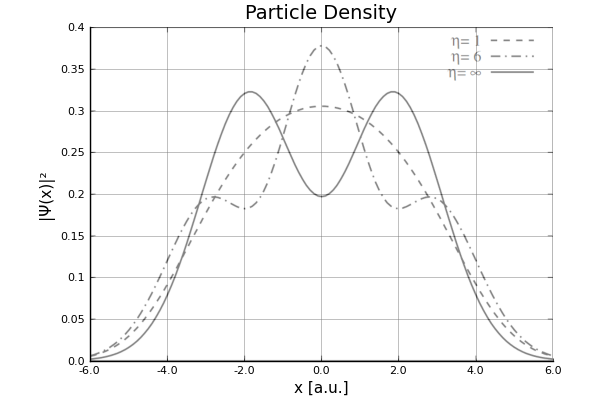

In [15]:
x_trans, y_trans = imgplot(file     = "Figures/GS.PNG",
                           extent   = [-6, 6, 0, 0.4],
                           imgalpha = 0.5,
                           yticks   = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
                           xticks   = [x for x in -6:2:6],
                           )
plt.plot!(legend=:topleft, title="Particle Density", xlabel="x [a.u.]", ylabel="|Ψ(x)|²")

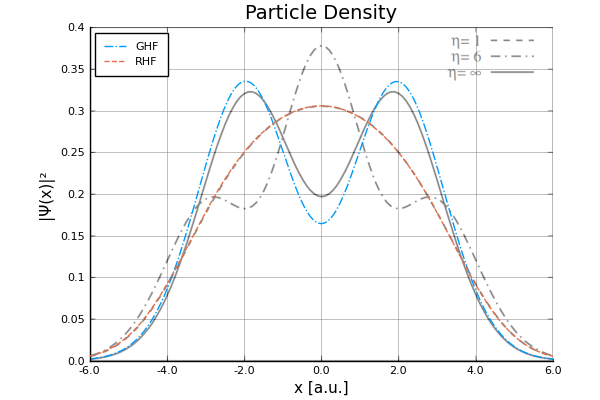

In [ ]:
x_trans, y_trans = imgplot(file     = "Figures/GS.PNG",
                           extent   = [-6, 6, 0, 0.4],
                           imgalpha = 0.5,
                           yticks   = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
                           xticks   = [x for x in -6:2:6],
                           )

plt.plot!(legend=:topleft, title="Particle Density", xlabel="x [a.u.]", ylabel="|Ψ(x)|²")
plt.plot!(x_trans.(grid), y_trans.(hf_density), label="GHF", lw=1, c=1, ls=:dashdot)
plt.plot!(x_trans.(grid), y_trans.(rhf_density), label="RHF", lw=1, c=2, ls=:dash)
#plt.plot!(x_trans.(radius), y_trans.(oneBodyDensity.*2), label="Slater-NN", lw=1, c=3)
plt.plot!()

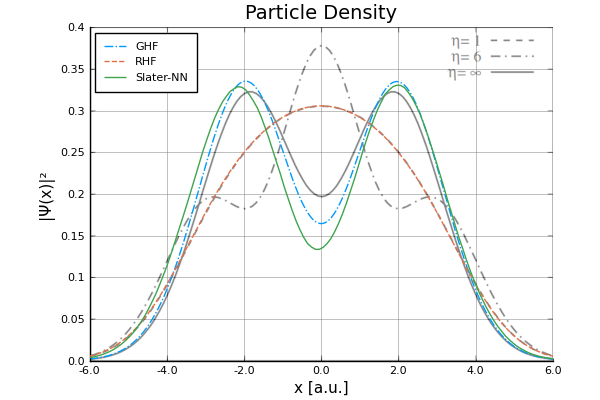

In [31]:
x_trans, y_trans = imgplot(file     = "Figures/GS.PNG",
                           extent   = [-6, 6, 0, 0.4],
                           imgalpha = 0.5,
                           yticks   = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
                           xticks   = [x for x in -6:2:6],
                           )

plt.plot!(legend=:topleft, title="Particle Density", xlabel="x [a.u.]", ylabel="|Ψ(x)|²")
plt.plot!(x_trans.(grid), y_trans.(hf_density), label="GHF", lw=1, c=1, ls=:dashdot)
plt.plot!(x_trans.(grid), y_trans.(rhf_density), label="RHF", lw=1, c=2, ls=:dash)
plt.plot!(x_trans.(radius), y_trans.(oneBodyDensity.*2), label="Slater-NN", lw=1, c=3)
plt.plot!()